In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

In [5]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [13]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
print(X_train.shape,X_test.shape)

(712, 3) (179, 3)


In [12]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [14]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [15]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [16]:
age_var = X_train['Age'].var()
age_med_var = X_train['Age_median'].var()
age_mean_var = X_train['Age_mean'].var()
print('Original,median,mean of age',age_var,age_med_var,age_mean_var );

Original,median,mean of age 204.3495133904614 161.9895663346054 161.81262452718673


In [17]:
fare_var = X_train['Fare'].var()
fare_mean_var = X_train['Fare_mean'].var()
fare_med_var = X_train['Fare_median'].var()

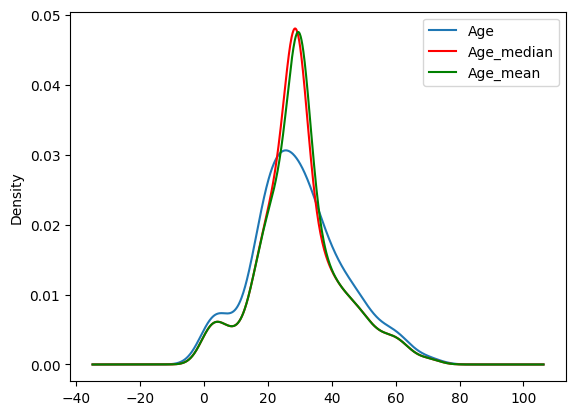

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

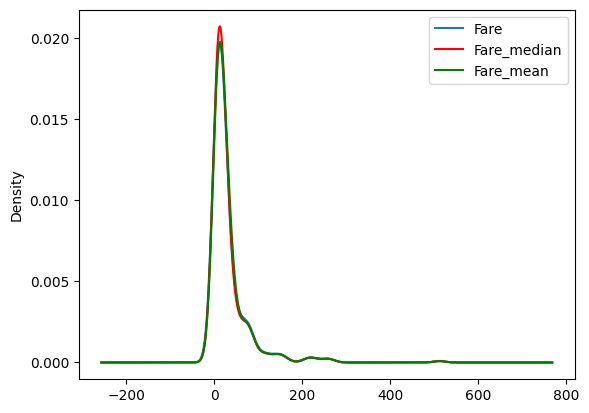

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
print(X_train.cov)

<bound method DataFrame.cov of       Age      Fare  Family
30   40.0   27.7208       0
10    4.0   16.7000       2
873  47.0    9.0000       0
182   9.0   31.3875       6
876  20.0    9.8458       0
..    ...       ...     ...
534  30.0    8.6625       0
584   NaN    8.7125       0
493  71.0   49.5042       0
527   NaN  221.7792       0
168   NaN   25.9250       0

[712 rows x 3 columns]>


In [23]:
print(X_test.corr)

<bound method DataFrame.corr of       Age     Fare  Family
707  42.0  26.2875       0
37   21.0   8.0500       0
615  24.0  65.0000       3
169  28.0  56.4958       0
68   17.0   7.9250       6
..    ...      ...     ...
89   24.0   8.0500       0
80   22.0   9.0000       0
846   NaN  69.5500      10
870  26.0   7.8958       0
251  29.0      NaN       2

[179 rows x 3 columns]>


Using Sklearn

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [25]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [26]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [27]:
trf.named_transformers_['imputer1'].statistics_
# median of age

array([28.75])

In [28]:
trf.named_transformers_['imputer2'].statistics_
# mean of fare

array([32.61759689])

In [29]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)